In [382]:
import math
import numpy as np

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set()
sns.set_context("paper", font_scale=1.2)
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)


In [383]:
df = pd.read_csv("fine_scores.csv")

In [384]:
# remove rows where loss is above 10
df = df[df['loss'] < 10]

In [385]:
# rename columns yaw to roll, pitch to yaw, roll to pitch
df = df.rename(columns={'yaw': 'roll', 'pitch': 'yaw', 'roll': 'pitch'})

In [386]:
df

,img_number,iterations,loss,pitch,yaw,roll,x,y,z
0,0,1188,1.972273,-0.484284,-107.734393,87.582448,0.146548,0.124753,-0.692639
1,1,491,0.178706,-0.413045,-100.074608,82.263264,0.246078,0.150893,0.175615
2,2,467,3.418136,-0.977132,-90.120728,78.271387,0.267696,0.157324,0.102261
3,3,496,2.287684,-1.757130,-99.675683,72.528192,0.260331,0.212253,-0.174865
4,4,1091,1.089659,-0.200598,-80.085648,65.448862,0.258464,0.240164,-0.177870
5,5,512,0.227830,0.052176,-75.042029,60.773529,0.238967,0.252364,-0.478579
6,6,555,4.028949,0.048182,-76.038019,55.471899,0.260315,0.266126,-0.465119
7,7,501,0.091868,-0.120521,-74.401600,52.268112,0.219864,0.236798,-1.064378
8,8,699,2.891884,-0.132697,-73.238193,46.929604,0.226798,0.251451,-1.063232
9,9,574,0.891630,-0.174270,-63.716691,39.409726,0.266666,0.243409,-0.618986


In [387]:
df['og_roll'] = df['roll']
df['roll'] = df['roll'].apply(lambda x: x % 360)
# df['pitch'] = df['pitch'].apply(lambda x: x % 360)
df['yaw'] = df['yaw'].apply(lambda x: x % 360)
# start real roll from roll index 0 and decreasing -5 each time wrappring around % 360
df['og_real_roll'] = (df['roll'][0] - 5 * df['img_number'])
df['real_roll'] = df['og_real_roll'].apply(lambda x: x % 360)

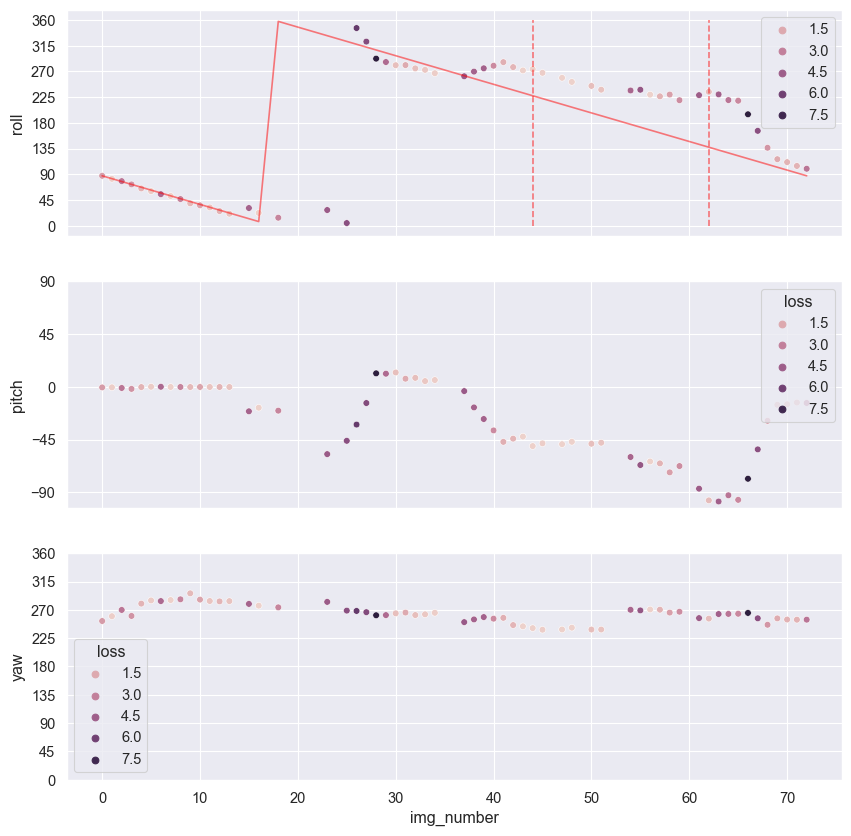

In [408]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
sns.scatterplot(ax=axes[0], data=df, x='img_number', y='roll', hue='loss');
axes[0].set_yticks(range(0, 361, 45));
sns.lineplot(ax=axes[0], data=df, x='img_number', y='real_roll', color='red', alpha=0.5);
axes[0].vlines(x=44, ymin=0, ymax=360, color='red', linestyles='dashed', alpha=0.5)
axes[0].vlines(x=62, ymin=0, ymax=360, color='red', linestyles='dashed', alpha=0.5)
sns.scatterplot(ax=axes[1], data=df, x='img_number', y='pitch', hue='loss');
axes[1].set_yticks(range(-90, 91, 45));
sns.scatterplot(ax=axes[2], data=df, x='img_number', y='yaw', hue='loss');
axes[2].set_yticks(range(0, 361, 45));

<Axes: xlabel='og_real_roll', ylabel='og_roll'>

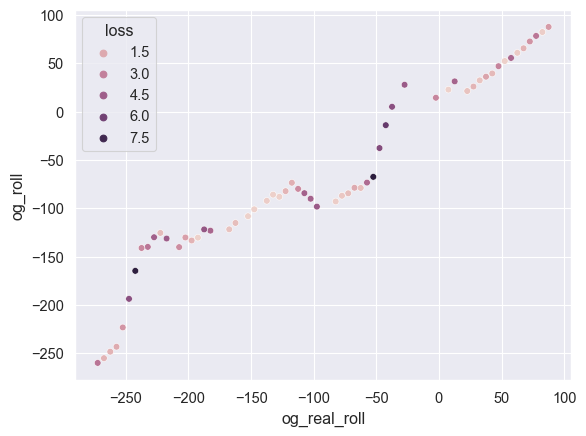

In [389]:
sns.scatterplot(data=df, x='og_real_roll', y='og_roll', hue='loss')

<Axes: xlabel='img_number', ylabel='roll_diff'>

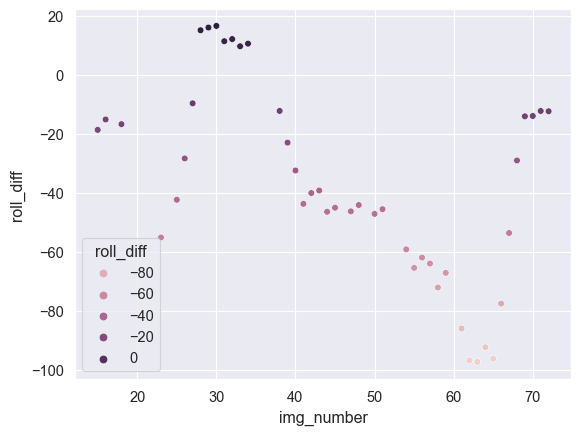

In [406]:
df['roll_diff'] = df['og_real_roll'] - df['og_roll']
sns.scatterplot(data=df[abs(df['roll_diff']) > 4], x='img_number', y='roll_diff', hue='roll_diff')

In [404]:
df[abs(df['roll_diff']) > 4]['img_number']

15    15
16    16
18    18
23    23
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
38    38
39    39
40    40
41    41
42    42
43    43
44    44
45    45
47    47
48    48
50    50
51    51
54    54
55    55
56    56
57    57
58    58
59    59
61    61
62    62
63    63
64    64
65    65
66    66
67    67
68    68
69    69
70    70
71    71
72    72
Name: img_number, dtype: int64

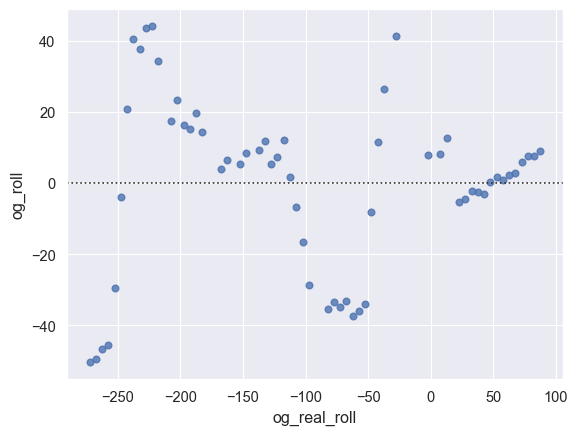

In [400]:
# make residual plot from real roll and roll
sns.residplot(data=df, x='og_real_roll', y='og_roll');

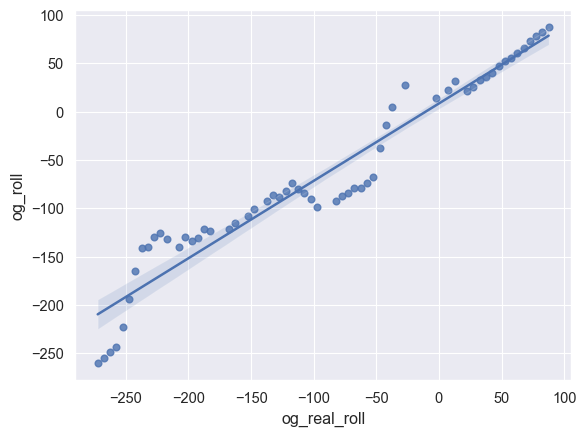

In [391]:
ax = sns.regplot(data=df, x='og_real_roll', y='og_roll');

In [392]:
# df['rounded_loss'] to nearest 1 decimal place
df['rounded_loss'] = df['loss'].apply(lambda x: round(x, 0))

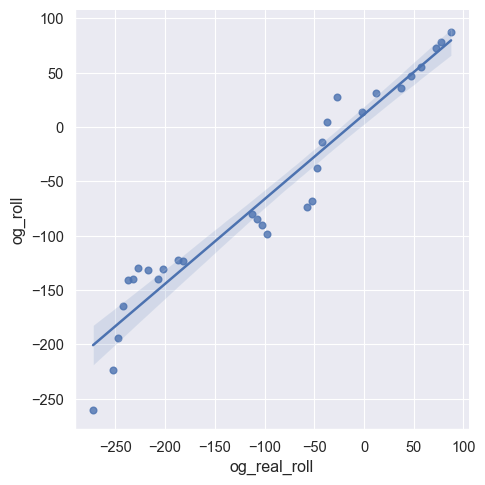

In [393]:
sns.lmplot(data=df[df['rounded_loss'] > 1], x='og_real_roll', y='og_roll');

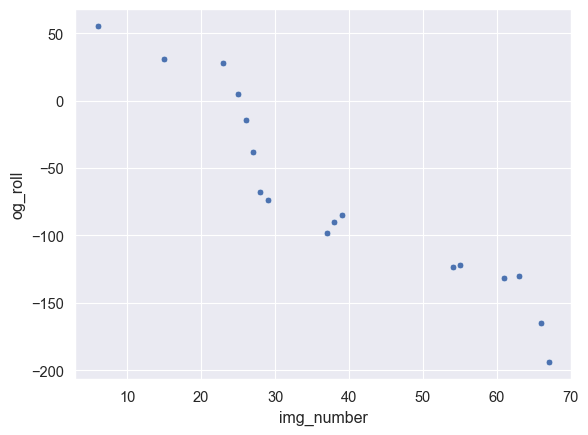

In [394]:
sns.scatterplot(data=df[df['rounded_loss'] > 3], y='og_roll', x='img_number');

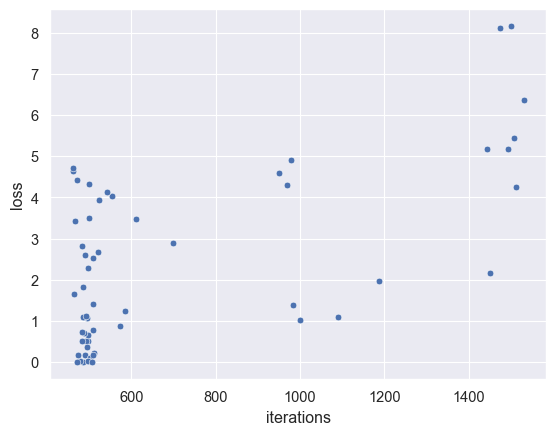

In [395]:
sns.scatterplot(data=df, y='loss', x='iterations');


In [407]:
# mse of real roll and roll
np.mean((df['og_real_roll'] - df['og_roll']) ** 2)


1816.0750538393365

In [304]:
df.describe()

,img_number,iterations,loss,pitch,yaw,roll,x,y,z,og_roll,og_real_roll,real_roll,rounded_loss
count,67.000000,67.000000,6.700000e+01,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,36.701493,1544.686567,2.064793e+01,17.731226,280.092013,153.040843,0.271890,0.107027,-1.012333,-115.615873,-95.980575,178.049276,20.641791
std,21.613699,767.926532,1.392447e+02,24.205942,16.811112,94.628806,0.138054,0.189327,1.429339,115.557655,108.068493,101.085526,139.276344
min,0.000000,720.000000,6.330998e-12,-42.119978,224.124477,9.294962,-0.264249,-0.213063,-7.369200,-312.828181,-272.473112,7.526888,0.000000
25%,19.000000,1040.000000,1.084323e-10,3.867486,272.348969,53.187616,0.202214,-0.020422,-1.331026,-200.934675,-189.973112,90.026888,0.000000
50%,37.000000,1357.000000,7.359617e-02,16.313583,285.985066,150.942795,0.256597,0.072830,-0.629941,-117.576587,-97.473112,172.526888,0.000000
75%,55.500000,1614.000000,2.363224e+00,33.143318,289.072680,240.698249,0.330374,0.219713,-0.287892,0.919669,-7.473112,265.026888,2.000000
max,72.000000,4494.000000,1.136799e+03,79.369764,311.320179,352.544375,0.720603,0.922686,0.475868,87.526888,87.526888,357.526888,1137.000000


In [261]:
# df['approx_pitch'] should be the pitch rounded to nearest 5
df['approx_pitch'] = df['pitch'].apply(lambda x: round(x / 10) * 10)

In [274]:
df_dist = pd.read_csv("distances.csv")

In [275]:
df_dist

,0,1,2,3,4,5
0,50.786869,71.270965,32.971911,49.811014,NaN,NaN
1,50.785844,71.269773,32.971595,49.810353,NaN,NaN
2,50.634137,70.326396,32.176150,48.751588,NaN,NaN
3,35.751411,52.606332,29.076365,39.348784,NaN,NaN
4,50.779234,71.252094,32.961957,49.790000,NaN,NaN
...,...,...,...,...,...,...
110856,1.732940,2.822925,8.270447,3.002610,NaN,NaN
110857,1.732925,2.822992,8.270438,3.002543,NaN,NaN
110858,1.732936,2.822737,8.270830,3.002845,NaN,NaN
110859,1.732923,2.822732,8.270935,3.002862,NaN,NaN


In [276]:
df_dist.describe()

,0,1,2,3,4,5
count,1.108610e+05,1.108610e+05,1.020230e+05,67139.000000,13272.000000,2561.000000
mean,4.712672e+00,1.103455e+01,1.354536e+01,20.822327,40.322908,112.164143
std,7.747001e+00,2.167223e+01,2.105612e+01,31.595389,46.860263,2.527273
min,3.523500e-07,1.397284e-07,4.836494e-07,0.000003,0.259204,93.498961
25%,3.106908e-01,4.566316e-01,9.344222e-01,1.785132,3.421324,110.598386
50%,1.326627e+00,1.753338e+00,4.595321e+00,5.535589,9.276110,113.021331
75%,4.141117e+00,6.818180e+00,1.292099e+01,15.169391,66.413822,113.862792
max,6.932748e+01,1.095001e+02,1.102007e+02,106.766752,142.531701,122.138941


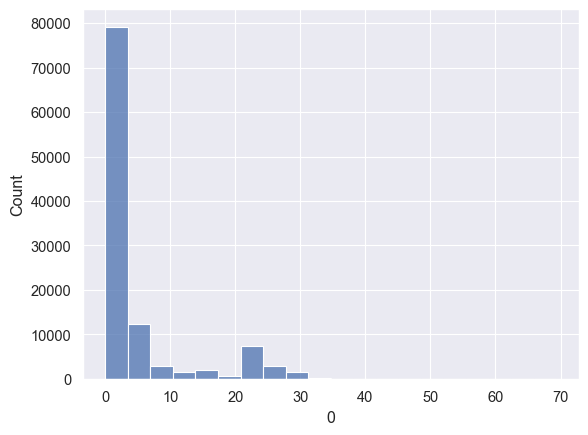

In [288]:
sns.histplot(data=df_dist, x='0', bins=20);